In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

cricket isn’t just a game to me it’s a feelingi have passion for cricket game 

['cricket', 'isn', '’', 't', 'just', 'a', 'game', 'to', 'me', 'it', '’', 's', 'a', 'feelingi', 'have', 'passion', 'for', 'cricket', 'game']
['Cricket isn’t just a game to me, It’s a feeling,i have passion for cricket game .']

Without stopwords:
 ['cricket', '’', 'game', '’', 'feelingi', 'passion', 'cricket', 'game']



<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

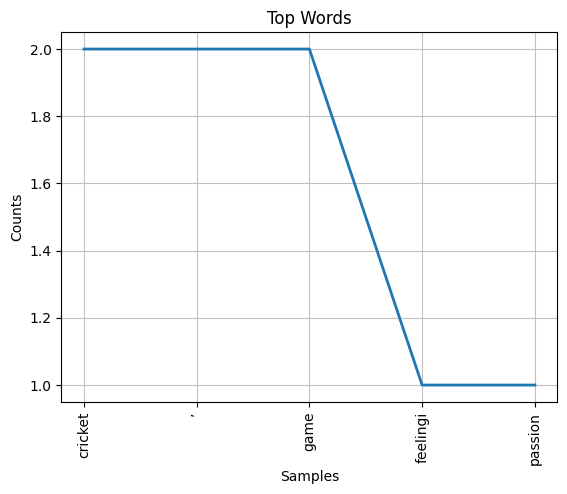

In [4]:
import string
para = "Cricket isn’t just a game to me, It’s a feeling,i have passion for cricket game ."
para_lower = para.lower()
para_clean = para_lower.translate(str.maketrans('', '', string.punctuation))
print(para_clean)
print()

word_tokens = word_tokenize(para_clean)
sent_tokens = sent_tokenize(para)
print(word_tokens)
print(sent_tokens)
print()

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
print("Without stopwords:\n", filtered_words)
print()

fd = FreqDist(filtered_words)
fd.plot(10, title="Top Words")


In [3]:
ps = PorterStemmer()
ls = LancasterStemmer()

for word in filtered_words:
    print(f"{word} -> PorterStemmer: {ps.stem(word)}    LancasterStemmer: {ls.stem(word)} ")
print()

lm = WordNetLemmatizer()

for word in filtered_words:
    print(f"{word} -> Lemmatized: {lm.lemmatize(word)}")

cricket -> PorterStemmer: cricket    LancasterStemmer: cricket 
’ -> PorterStemmer: ’    LancasterStemmer: ’ 
game -> PorterStemmer: game    LancasterStemmer: gam 
’ -> PorterStemmer: ’    LancasterStemmer: ’ 
feelingi -> PorterStemmer: feelingi    LancasterStemmer: feeling 
passion -> PorterStemmer: passion    LancasterStemmer: pass 

cricket -> Lemmatized: cricket
’ -> Lemmatized: ’
game -> Lemmatized: game
’ -> Lemmatized: ’
feelingi -> Lemmatized: feelingi
passion -> Lemmatized: passion


In [5]:
print("More than 5 letter words:\n",re.findall(r'\b\w{6,}\b', para))
print("Numbers: \n",re.findall(r'\b\d+\b', para))
print("Capitalized words: \n",re.findall(r'\b[A-Z][a-z]*\b', para))
print()
print("Words containing only alphabets: \n",re.findall(r'\b[a-zA-Z]+\b', para))
print("Words starting with vowels: \n",re.findall(r'\b[aeiouAEIOU]\w*\b', para))

More than 5 letter words:
 ['Cricket', 'feeling', 'passion', 'cricket']
Numbers: 
 []
Capitalized words: 
 ['Cricket', 'It']

Words containing only alphabets: 
 ['Cricket', 'isn', 't', 'just', 'a', 'game', 'to', 'me', 'It', 's', 'a', 'feeling', 'i', 'have', 'passion', 'for', 'cricket', 'game']
Words starting with vowels: 
 ['isn', 'a', 'It', 'a', 'i']


In [8]:
def custom_tokenizer(text):
  pattern = r"\b\w+(?:-\w+)*\b|\d+\.\d+|\w+'\w+"
  return re.findall(pattern, text)

print(custom_tokenizer(para))

def replace_placeholders(text):
    text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", "", text)
    text = re.sub(r"https?://(?:www\.)?[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", "", text)
    text = re.sub(r"\+?\d{1,3}\s??[-\s]?\d{1,4}[-\s]?\d{1,4}[-\s]?\d{1,4}", "", text)
    return text

text = "Contact me at daddy@gmail.com or visit our website at https://www.github.com or call +91 7589878775. or call 123-456-7890 "

print(replace_placeholders(text))

['Cricket', 'isn', 't', 'just', 'a', 'game', 'to', 'me', 'It', 's', 'a', 'feeling', 'i', 'have', 'passion', 'for', 'cricket', 'game']
Contact me at  or visit our website at  or call . or call  
